In [155]:
import pandas as pd
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import yellowbrick as yb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from yellowbrick import SilhouetteVisualizer

In [261]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]
data = pd.read_csv("data/KDDTrain+.txt", header = None, names = col_names)

In [249]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [250]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [228]:
from sklearn.preprocessing import LabelBinarizer

In [229]:
plt.matshow(df.corr())

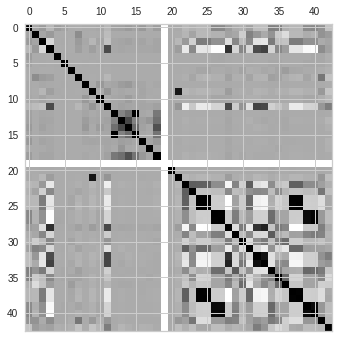

In [230]:
plt.show()

In [231]:
len(data.columns)

43

In [232]:
X = data[col_names].as_matrix()
y = data.label.as_matrix()

In [233]:
y

array(['normal', 'normal', 'neptune', ..., 'normal', 'neptune', 'normal'], dtype=object)

In [234]:
from yellowbrick.features.rankd import Rank1D, Rank2D 
from yellowbrick.features.radviz import RadViz 
from yellowbrick.features.pcoords import ParallelCoordinates 
from yellowbrick.features.jointplot import JointPlotVisualizer
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.scatter import ScatterVisualizer
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer

In [251]:
df=data

In [252]:
df.protocol_type = preprocessing.LabelEncoder().fit_transform(df["protocol_type"])
df.service = preprocessing.LabelEncoder().fit_transform(df["service"])
df.flag = preprocessing.LabelEncoder().fit_transform(df["flag"])
df.label = preprocessing.LabelEncoder().fit_transform(df["label"])

In [253]:
X = df[col_names].as_matrix()
y = df.label.as_matrix()

In [254]:
y

array([11, 11,  9, ..., 11,  9, 11])

/usr/local/lib/python3.5/dist-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.5/dist-packages/scipy/stats/morestats.py:1323: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


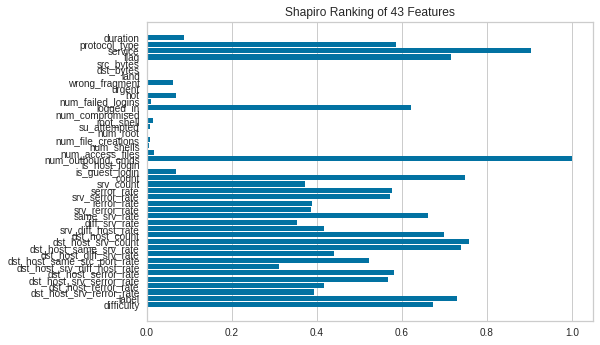

In [255]:
visualizer = Rank1D(features=col_names, algorithm='shapiro')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.5/dist-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


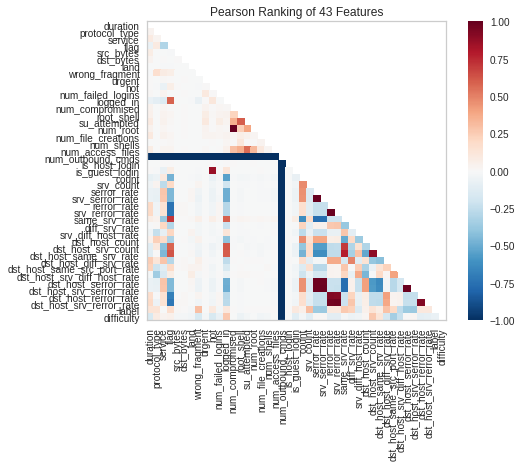

In [256]:
visualizer = Rank2D(features=col_names, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()    # Draw/show/poof the data


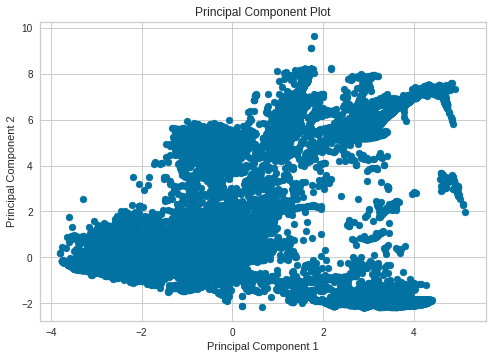

In [257]:
visualizer = PCADecomposition(scale=True, center=False, col=y)
visualizer.fit_transform(X,y)
visualizer.poof()

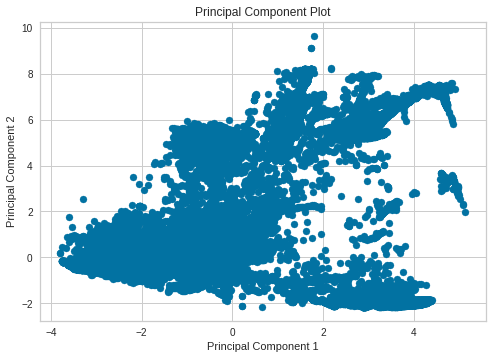

In [258]:


visualizer = PCADecomposition(scale=True, center=False, col=y, proj_dim=2)
visualizer.fit_transform(X,y)
visualizer.poof()



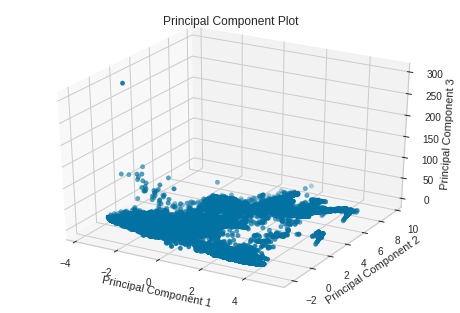

In [242]:
visualizer = PCADecomposition(scale=True, center=False, col=y, proj_dim=3)
visualizer.fit_transform(X,y)
visualizer.poof()

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [140]:
from sklearn.linear_model import Ridge, Lasso 
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import PredictionError, ResidualsPlot

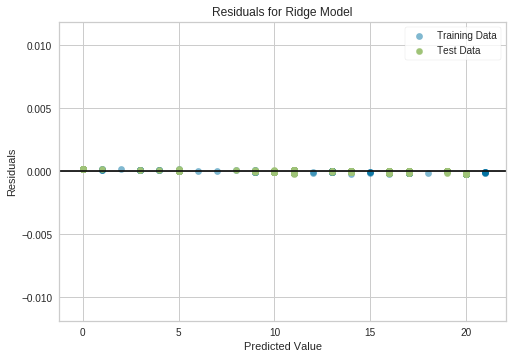

In [243]:
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             #

In [142]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance,  ConfusionMatrix, DecisionBoundariesVisualizer

/home/prabhant/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [144]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [146]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [147]:
print(clf.feature_importances_)

[ 0.          0.02226974  0.          0.11401007  0.11818756  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.01076675  0.          0.07606835  0.          0.
  0.10855833  0.0893588   0.          0.00642105  0.00368694  0.07103262
  0.0851208   0.03554502  0.          0.0446379   0.00833319  0.
  0.02278911  0.18321376  0.        ]


In [262]:
data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [263]:
labels = data['label'].copy()
labels[labels!='normal'] = 'anomaly'
labels.value_counts()

normal     67343
anomaly    58630
Name: label, dtype: int64

In [264]:
test_data = pandas.read_csv("data/KDDTest.txt", header=None, names = col_names)
test_data['label'].value_counts()

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
loadmodule            2
phf                   2
worm                  2
sqlattack             2
perl                  2
udpstorm              2
imap                  1
Name: label, dtype: int64

In [265]:
test_labels = test_data['label'].copy()
test_labels[labels!='normal'] = 'anomaly'
test_labels[labels!='anomaly'] = 'normal'
test_labels.value_counts()

normal     12042
anomaly    10502
Name: label, dtype: int64

In [275]:
num_features = [
    "duration","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]
scaler = MinMaxScaler()

features = df[num_features].astype(float)
features[num_features] = scaler.fit_transform(features[num_features])


In [277]:
df2=test_data
df2.protocol_type = preprocessing.LabelEncoder().fit_transform(df2["protocol_type"])
df2.service = preprocessing.LabelEncoder().fit_transform(df2["service"])
df2.flag = preprocessing.LabelEncoder().fit_transform(df2["flag"])
df2.label = preprocessing.LabelEncoder().fit_transform(df2["label"])

In [278]:
df2[num_features] = df2[num_features].astype(float)
df2[num_features]=scaler.fit_transform(df2[num_features])

In [268]:
test_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0.000000,tcp,private,REJ,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,0.000000,tcp,private,REJ,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
2,0.000035,tcp,ftp_data,SF,2.066513e-04,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
3,0.000000,icmp,eco_i,SF,3.183413e-07,0.000000e+00,0.0,0.0,0.0,0.000000,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
4,0.000017,tcp,telnet,RSTO,0.000000e+00,1.114474e-05,0.0,0.0,0.0,0.000000,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
5,0.000000,tcp,http,SF,4.249857e-06,1.078439e-02,0.0,0.0,0.0,0.000000,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
6,0.000000,tcp,smtp,SF,1.626724e-05,2.875342e-04,0.0,0.0,0.0,0.000000,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
7,0.000000,tcp,telnet,SF,2.053302e-06,1.292789e-04,0.0,0.0,0.0,0.000000,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
8,0.000000,tcp,http,SF,5.204881e-06,3.469728e-04,0.0,0.0,0.0,0.000000,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
9,0.000000,tcp,ftp,SF,4.138437e-07,1.166482e-04,0.0,0.0,0.0,0.000000,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7


In [269]:

from sklearn.cluster import KMeans
k = 60
km = KMeans(n_clusters = k)

t0 = time()
km.fit(features)
tt = time()-t0
print("Clustered in {} seconds".format(round(tt,3)))

##################################################
##### Get labels for each cluster formed
##################################################

# labels = kdd_data_10percent['label']
label_names = list(map(
    lambda x: pandas.Series([labels[i] for i in range(len(km.labels_)) if km.labels_[i]==x]), 
    range(k)))


# for i in range(k):
#     print("Cluster {} labels:".format(i))
#     print(label_names[i].value_counts())
#     print()


##################################################
##### Get one label for each cluster based on max frequency
##################################################

clusters = []
for i in range(len(label_names)):
    clusters.append(label_names[i].value_counts().index.tolist()[0])


Clustered in 50.245 seconds


In [279]:
corrected = test_data[num_features].astype(float)
true_labels = test_data['label'].copy()
true_labels[true_labels!='normal.'] = 'anomaly'

/usr/local/lib/python3.5/dist-packages/pandas/core/ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [270]:
corrected

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,...,1.000000,0.039216,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00
1,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,...,1.000000,0.003922,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00
2,0.000035,2.066513e-04,0.000000e+00,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,...,0.525490,0.337255,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00
3,0.000000,3.183413e-07,0.000000e+00,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,...,0.011765,0.223529,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00
4,0.000017,0.000000e+00,1.114474e-05,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,...,0.113725,0.337255,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71
5,0.000000,4.249857e-06,1.078439e-02,0.0,0.0,0.0,0.000000,0.00,1.0,0.000000,...,0.607843,1.000000,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00
6,0.000000,1.626724e-05,2.875342e-04,0.0,0.0,0.0,0.000000,0.00,1.0,0.000000,...,1.000000,0.109804,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04
7,0.000000,2.053302e-06,1.292789e-04,0.0,0.0,0.0,0.000000,0.25,0.0,0.000000,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02
8,0.000000,5.204881e-06,3.469728e-04,0.0,0.0,0.0,0.000000,0.00,1.0,0.000000,...,0.592157,1.000000,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00
9,0.000000,4.138437e-07,1.166482e-04,0.0,0.0,0.0,0.000000,0.25,0.0,0.000000,...,0.203922,0.101961,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00


Assigned clusters in 0.068 seconds


Accuracy 39.186 %


Confusion Matrix: 

 [[ 8834 13710]
 [    0     0]]


Classification Scores: 

              precision    recall  f1-score   support

    anomaly       1.00      0.39      0.56     22544
     normal       0.00      0.00      0.00         0

avg / total       1.00      0.39      0.56     22544



/home/prabhant/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
